## ARIMA and Seasonal ARIMA
### Autoregressive Integrated Moving Averages
#### The general process of ARIMA models:

     1) Visualize Time Series Data
     2) Make the time series data stationary
     3) Plot the Auto Correlation and Partial Auto Correlation Charts
     4) Construct the ARIMA Model by trying different d,p,q parameters
     5) Use the model to make the prediction 

#### We can call a model ARIMA model if we apply differencing (I) at least once to make the data stationary and combine autoregressive (AR) and moving averages(MA) to make some forecasting based on old time-series data. The equation of this model can be explained by the following expressions:

#### Prediction = constant + linear combination lags of Y + linear combination of lagged forecast errors

In [1]:
import pandas as pd
import numpy as np
import datetime

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing



from sklearn.metrics import mean_squared_error
 

import matplotlib.pylab as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_df = pd.read_excel('Catalyst Sales.xlsx',sheet_name='Sheet4')

In [3]:
raw_df.head()

,Month,Basf_Shanghai,Sanjing,Umicore_Suzhou,PC,EC-Local,MOC,Ru,IR,PdCl2,Total_NPM
0,2011-01-01,970.61960,340.97800,179.52190,145.49230,939.99310,155.45040,6.65310,10.17100,27.04340,2775.92280
1,2011-02-01,1229.35790,275.43440,285.20580,120.78010,368.09010,92.85810,13.36840,61.34960,101.31250,2547.75690
2,2011-03-01,894.92476,396.20573,196.32061,125.83601,1029.81071,176.81600,193.06580,98.28357,198.76983,3310.03302
3,2011-04-01,1129.44547,345.91395,341.39728,29.69912,868.84823,520.12490,279.01713,24.11725,152.66580,3691.22913
4,2011-05-01,1176.70740,292.11531,90.49885,102.48793,1207.48691,251.29256,337.57237,42.81330,176.10069,3677.07532


In [4]:
raw_df.info

<bound method DataFrame.info of         Month  Basf_Shanghai    Sanjing  Umicore_Suzhou         PC  \
0  2011-01-01      970.61960  340.97800       179.52190  145.49230   
1  2011-02-01     1229.35790  275.43440       285.20580  120.78010   
2  2011-03-01      894.92476  396.20573       196.32061  125.83601   
3  2011-04-01     1129.44547  345.91395       341.39728   29.69912   
4  2011-05-01     1176.70740  292.11531        90.49885  102.48793   
..        ...            ...        ...             ...        ...   
79 2017-08-01        0.00000   60.20000       300.51000  665.32000   
80 2017-09-01        0.00000   80.50000       165.30000  796.80000   
81 2017-10-01        0.00000   81.60000        80.54000  890.03000   
82 2017-11-01        0.00000   98.00000        55.45000  689.54000   
83 2017-12-01        0.00000   65.32000       235.65000  891.35000   

     EC-Local          MOC         Ru         IR      PdCl2   Total_NPM  
0    939.99310   155.45040    6.65310   10.17100   27

In [5]:
raw_df['Month'].dtypes

dtype('<M8[ns]')

In [6]:
raw_df['Month'] = pd.to_datetime(raw_df['Month'])

In [7]:
raw_df.head()


,Month,Basf_Shanghai,Sanjing,Umicore_Suzhou,PC,EC-Local,MOC,Ru,IR,PdCl2,Total_NPM
0,2011-01-01,970.61960,340.97800,179.52190,145.49230,939.99310,155.45040,6.65310,10.17100,27.04340,2775.92280
1,2011-02-01,1229.35790,275.43440,285.20580,120.78010,368.09010,92.85810,13.36840,61.34960,101.31250,2547.75690
2,2011-03-01,894.92476,396.20573,196.32061,125.83601,1029.81071,176.81600,193.06580,98.28357,198.76983,3310.03302
3,2011-04-01,1129.44547,345.91395,341.39728,29.69912,868.84823,520.12490,279.01713,24.11725,152.66580,3691.22913
4,2011-05-01,1176.70740,292.11531,90.49885,102.48793,1207.48691,251.29256,337.57237,42.81330,176.10069,3677.07532


In [8]:
raw_df.set_index('Month',inplace=True)

In [9]:
raw_df.head()

,Basf_Shanghai,Sanjing,Umicore_Suzhou,PC,EC-Local,MOC,Ru,IR,PdCl2,Total_NPM
Month,,,,,,,,,,
2011-01-01,970.61960,340.97800,179.52190,145.49230,939.99310,155.45040,6.65310,10.17100,27.04340,2775.92280
2011-02-01,1229.35790,275.43440,285.20580,120.78010,368.09010,92.85810,13.36840,61.34960,101.31250,2547.75690
2011-03-01,894.92476,396.20573,196.32061,125.83601,1029.81071,176.81600,193.06580,98.28357,198.76983,3310.03302
2011-04-01,1129.44547,345.91395,341.39728,29.69912,868.84823,520.12490,279.01713,24.11725,152.66580,3691.22913
2011-05-01,1176.70740,292.11531,90.49885,102.48793,1207.48691,251.29256,337.57237,42.81330,176.10069,3677.07532


In [10]:
df = pd.DataFrame(raw_df,columns = ['Total_NPM'])

In [11]:
df.head()

,Total_NPM
Month,
2011-01-01,2775.92280
2011-02-01,2547.75690
2011-03-01,3310.03302
2011-04-01,3691.22913
2011-05-01,3677.07532


<AxesSubplot:xlabel='Month'>

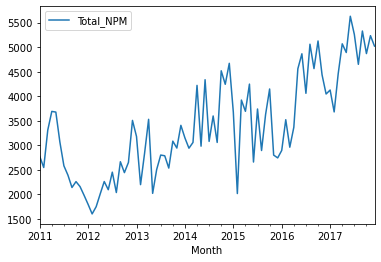

In [12]:
df.plot()

In [38]:
# test for stationary
# H0: It is non stationary
# Ha: It is stationary

adfuller_result = adfuller(df['Total_NPM'])
adfuller_result

(-0.8340469775185109,
 0.8089159204735344,
 3,
 80,
 {'1%': -3.5148692050781247, '5%': -2.8984085156250003, '10%': -2.58643890625},
 1121.5506681892223)

### From the result, p value is 0.81 >0.05, so we could not reject the null hypothesis. 

## the value of d

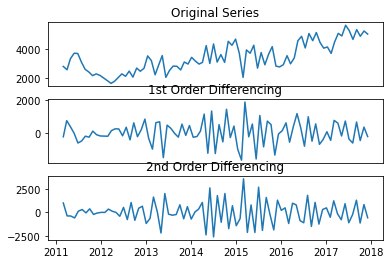

In [35]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df.Total_NPM); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df.Total_NPM.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df.Total_NPM.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

### We can see how the time seriel become stationary after first-order differencing. 

### So we can select first order differencing for our model. And set d = 1


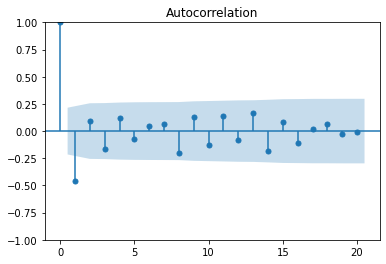

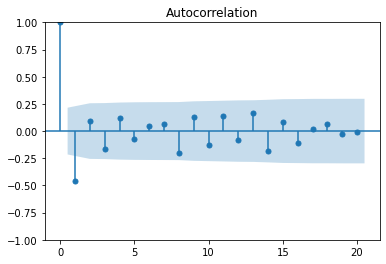

In [34]:
plot_acf(df['Total_NPM'].diff().dropna()) 

### By the plot_ acf, the immediate lag has gone on the negative side, representing that in the first-order the series has become over the difference.   

## the value of q

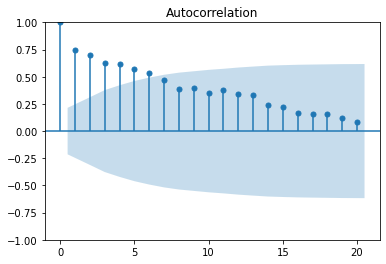

In [30]:
acf_plot = plot_acf(df.Total_NPM)

#### ACF plot. Which will tell us how much moving average is required to remove the autocorrelation from the stationary time series. 
#### with start from q = 3

    autocorrelation, where we find the relationship between a time series point to the whole past time series.

## value of p

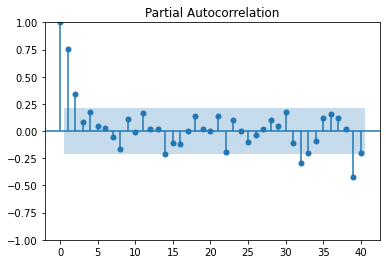

In [16]:
pacf_plot = plot_pacf(df.Total_NPM, lags=40)

        Mathematically Partial autocorrelation in a time series can be considered the degree of correlation between an observation in a given time with the observations own lagged value,

#### Using the PACF plot we can take the order of AR terms to be equal to the lags that can cross a significance limit. 
#### We should start on auto regressive model with lags start from p = 2 

In [18]:
TEST_SIZE = 20
train, test = df.iloc[:-TEST_SIZE], df.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], df.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((64, 1), (64,), (20, 1), (20,))

In [19]:
test.head()

,Total_NPM
Month,
2016-05-01,4560.350
2016-06-01,4865.330
2016-07-01,4059.650
2016-08-01,5060.125
2016-09-01,4563.500


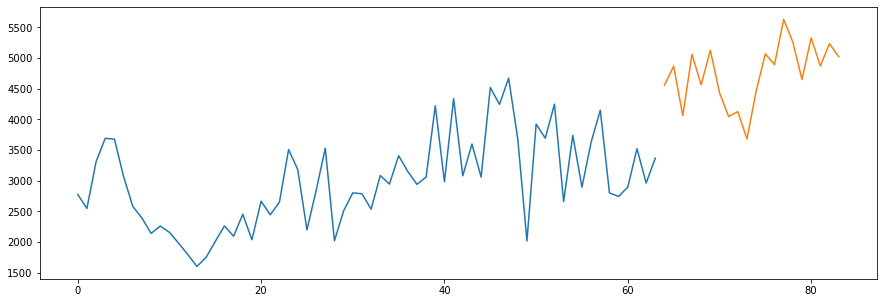

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

In [21]:
# try with auto_arima
from pmdarima.arima import auto_arima

In [36]:
model = auto_arima(train, start_p=1, start_q=0,d=1,
                      test='adf',
                      max_p=5, max_q=5,max_d=5,
                      start_P=0,start_Q=0,start_D=1, 
                      max_P=5, max_Q=5,max_D=5, 
                      m=12,             
                      seasonal=True,   
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=840.190, Time=0.04 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=859.014, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=826.080, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=825.745, Time=0.27 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=824.499, Time=0.52 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=inf, Time=1.19 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=1.14 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=1.79 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=839.114, Time=0.42 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=826.326, Time=0.67 sec
 ARIMA(1,1,1)(3,1,0)[12]             : AIC=824.441, Time=0.67 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=826.615, Time=0.40 sec
 ARIMA(1,1,1)(4,1,0)[12]             : AIC=823.474, T

In [131]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   64
Model:             SARIMAX(0, 1, 1)x(5, 1, [], 12)   Log Likelihood                -403.948
Date:                             Wed, 14 Dec 2022   AIC                            821.897
Time:                                     21:52:11   BIC                            835.420
Sample:                                          0   HQIC                           827.064
                                              - 64                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6464      0.112     -5.761      0.000      -0.866      -0.426
ar.S.L12      -1.7946      0.737     -2.434      0.015      -3.239      -0.350
ar.S.L24      -2.2146      0.782     -2.833      0.005      -3.747      -0.683
ar.S.L36      -2.2083      0.780     -2.831      0.005      -3.737      -0.680
ar.S.L48      -1.7690      0.732     -2.415      0.016      -3.205      -0.333
ar.S.L60      -0.9651      0.026    -37.789      0.000      -1.015      -0.915
sigma2      1.601e+04   5.39e-06   2.97e+09      0.000     1.6e+04     1.6e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 2.33
Prob(Q):                              0.69   Prob(JB):                         0.31
Heteroskedasticity (H):               1.53   Skew:                            -0.49
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.16e+26. Standard errors may be unstable.
"""

In [37]:
model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(5, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [46]:
# Forecast

prediction = pd.DataFrame(model.predict(n_periods=20),index=test.index)

prediction.columns = ['predicted_sales']
prediction.head()

,predicted_sales
Month,
2016-05-01,3312.920069
2016-06-01,3471.519985
2016-07-01,3024.947128
2016-08-01,3053.155714
2016-09-01,2978.283527


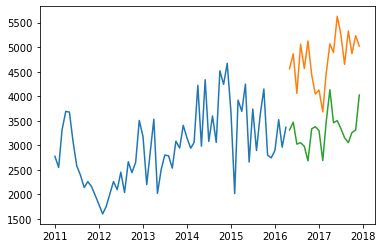

In [45]:
plt.plot(train,label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(prediction,label = 'predicted')

plt.show()

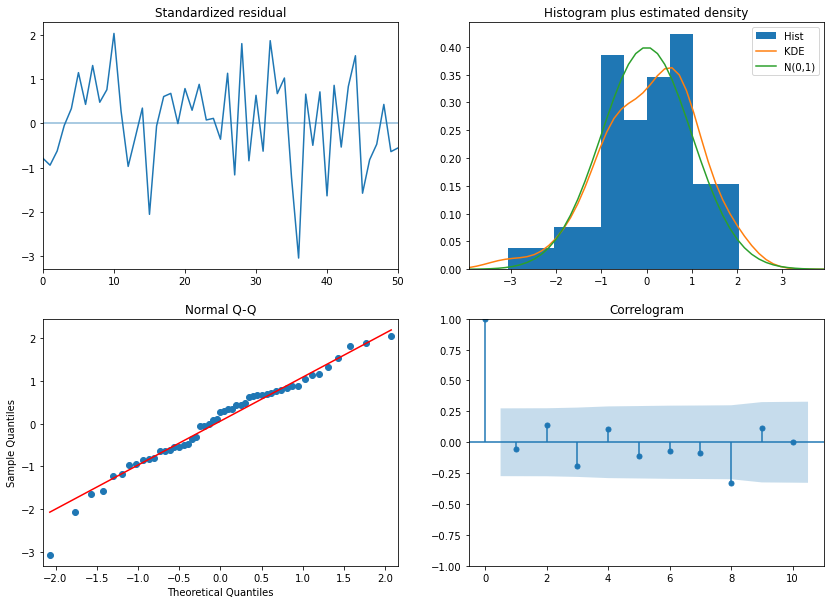

In [149]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

In [157]:
def measure_rmse(actual, predicted):
      return np.sqrt(mean_squared_error(actual, prediction))


In [158]:
error = measure_rmse(test, prediction)
error 

1536.3750003261582

### The major reason of the jump of the total sales of NMP is China has issued policy to stimulate the economic growth in 2016, inflation rate raised because of the stimulation.  